In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
df= pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [ ]:
print("Null Values in the Dataset:")
print(df.isnull().sum())

Null Values in the Dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [ ]:
df.columns=[1,2,3,4,5,6,7,8,9]

In [ ]:
df[9].value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: 9, Length: 3842, dtype: int64

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: 9, Length: 20640, dtype: float64

<Figure size 1000x800 with 0 Axes>

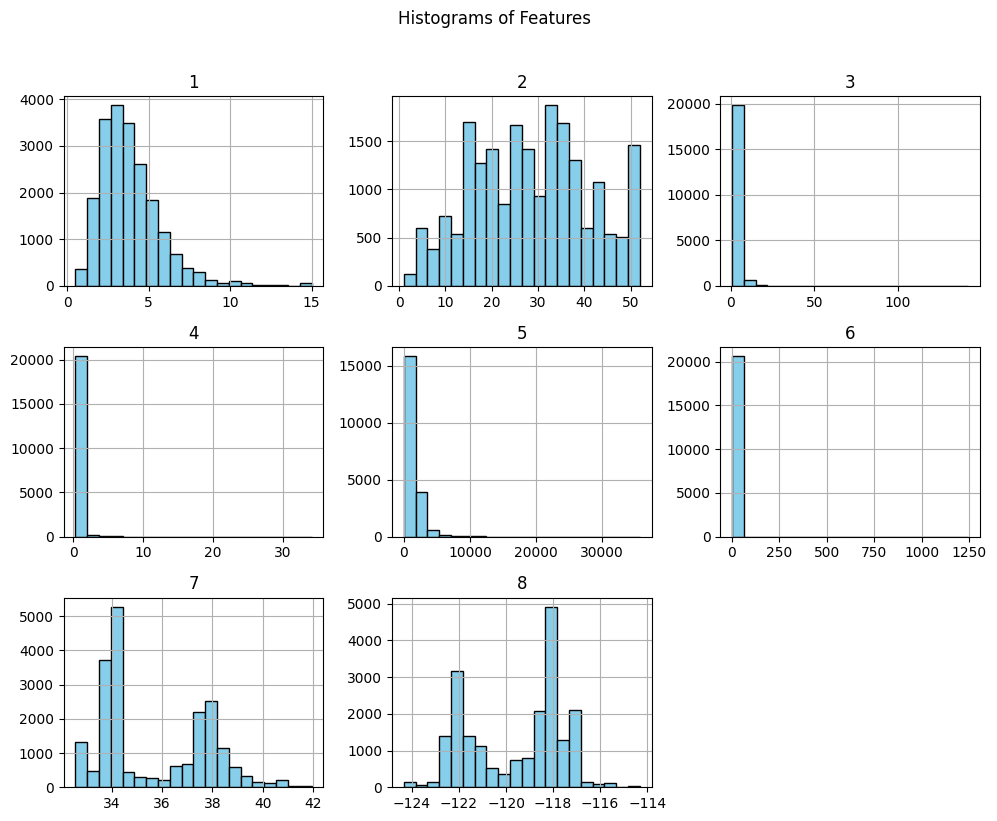

In [ ]:
plt.figure(figsize=(10, 8))
x.hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features", y=1.02)
plt.tight_layout()
plt.show()

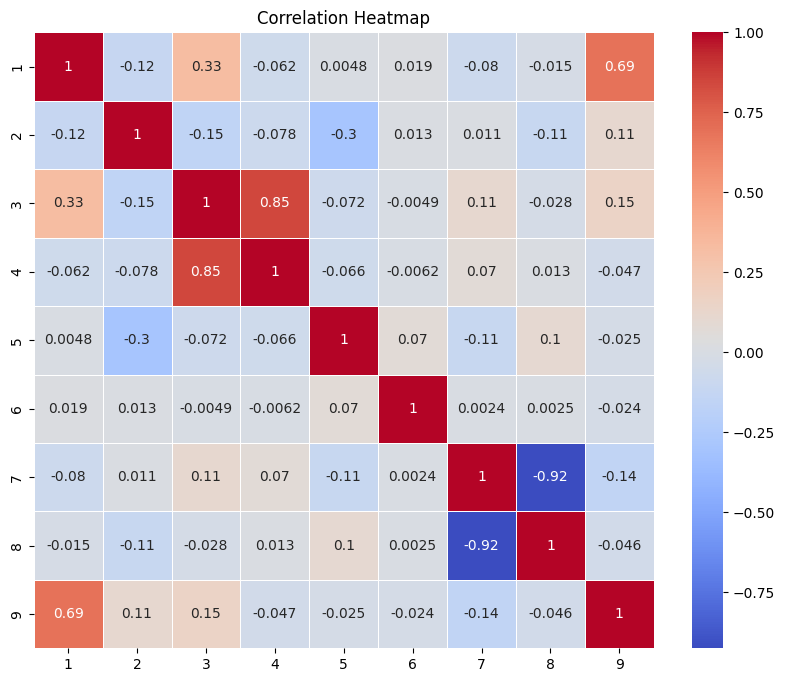

In [ ]:
plt.figure(figsize=(10, 8))
data_with_target = pd.concat([x, y], axis=1)
correlation_matrix = data_with_target.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-34-dd9a2d517124>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix = pd.plotting.scatter_matrix(df.iloc[:, :8], c=df[9], marker='o', cmap='viridis', ax=ax)


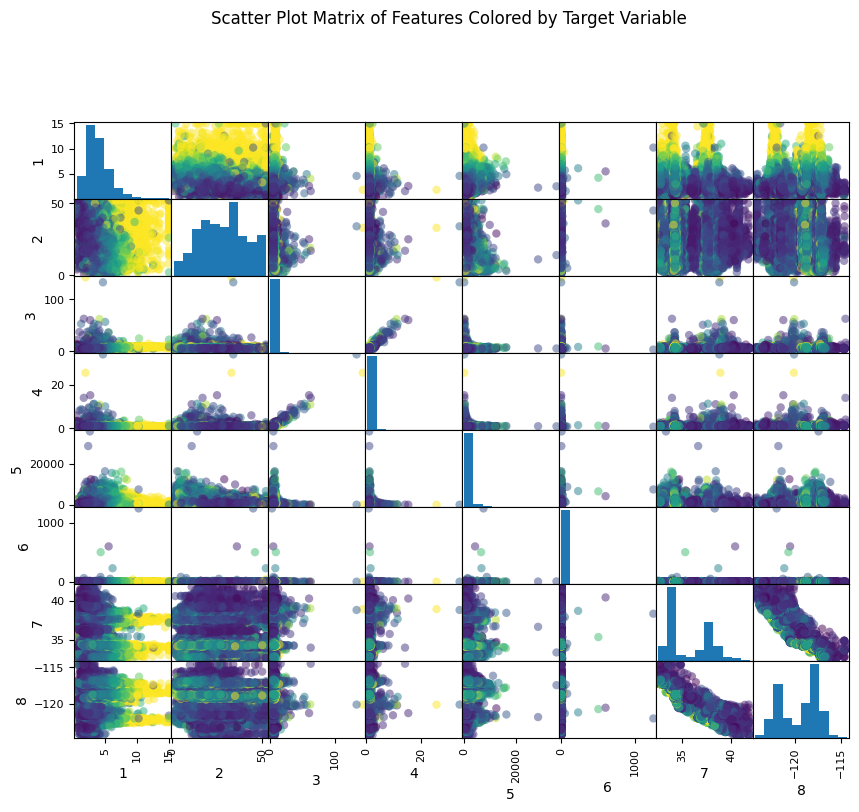

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter_matrix = pd.plotting.scatter_matrix(df.iloc[:, :8], c=df[9], marker='o', cmap='viridis', ax=ax)
plt.suptitle("Scatter Plot Matrix of Features Colored by Target Variable", y=1.02)
plt.show()

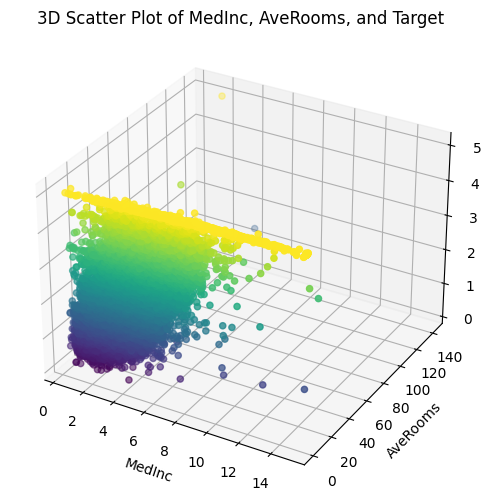

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[1], df[3], df[9], c=df[9], cmap='viridis', marker='o')
ax.set_xlabel('MedInc')
ax.set_ylabel('AveRooms')
ax.set_zlabel('Target')
plt.title("3D Scatter Plot of MedInc, AveRooms, and Target")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 1.1694
R-squared: 0.1076


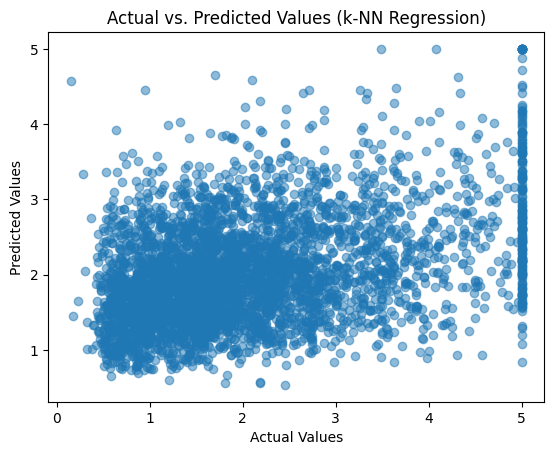

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (k-NN Regression)")
plt.show()